# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Изучение информации о файле

In [1]:
# !pip install -r requirements.txt
#при необходимости есть возможность выполнить данную команду
# и установить файл с версиями библиотек, использованными в данном проекте

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

pd.set_option('display.max_columns', None)
data.head()  #Прочитаем файл и просмотрим первые 5 строк данноо датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info() #На данном шаге смотрим информацию о таблице и о типах данных, которые она содержит

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Количество пропусков в датасете
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# Количество явных дубликатов в датасете
data.duplicated().sum()

0

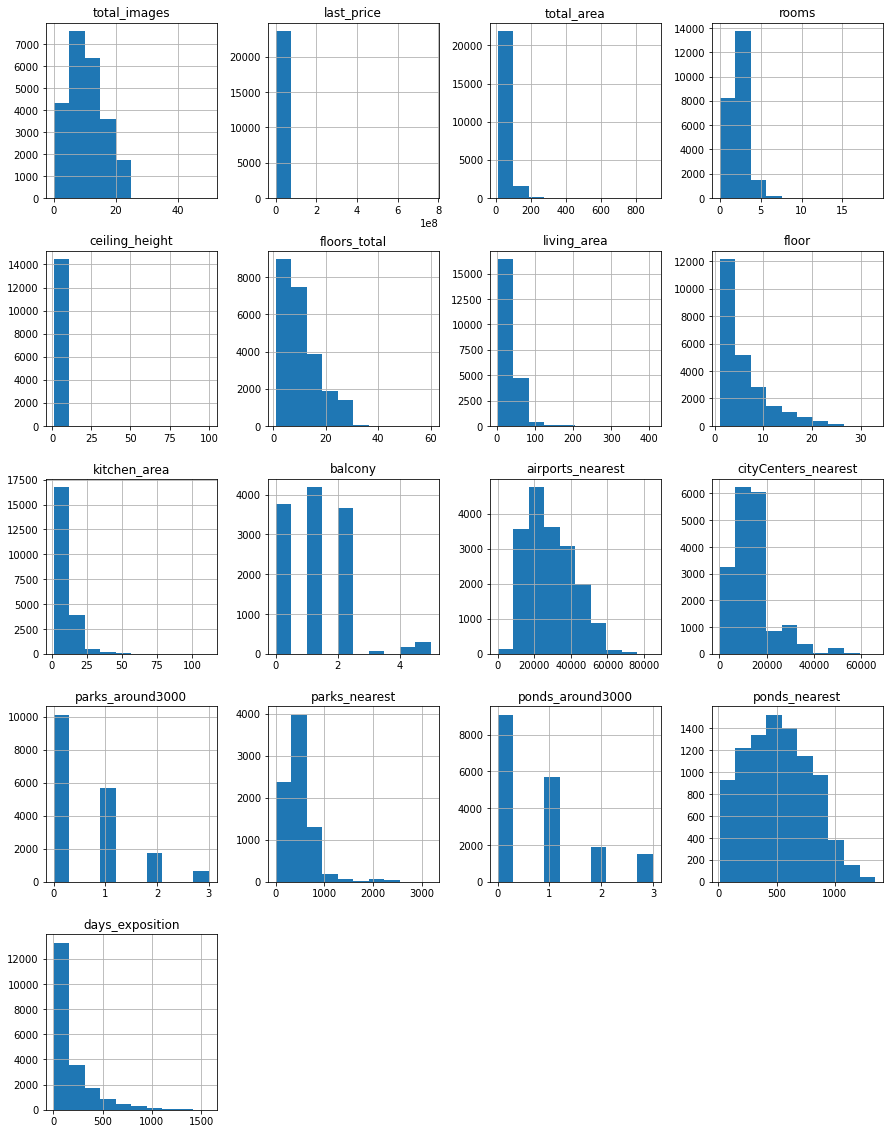

In [6]:
# Построим гистограммы:

data.hist(figsize= (15, 20));

## Вывод по типам данных:

- Имеются пропуски в столбцах:

    * ceiling_height

    * floors_total

    * living_area

    * is_apartment

    * kitchen_area

    * balcony

    * locality_name

    * cityCenters_nearest

    * parks_around3000

    * parks_nearest

    * ponds_around3000

    * ponds_nearest



Но отсутствуют явные дубликаты.
Пропуски могут быть вызваны либо человеческим фактором, так как ряд данных был заполнен людьми (например, если отсутствует балкон,человек мог пропустить строку, подразумевая, что балкона нет, что привело к пропуску), либо техническими ошибками в случае, когда данные предоставляются прочими службами.

2. Некоторые столбцы имеют неверный тип данных:
    * **is apartment** должен иметь тип данных **bool**, так как данные в данном столбце либо да, либо нет;

    * **first_day_exposition** должен быть **datetime**; 

    * **floors_total, days_exposition, balcony, parks_around3000, ponds_around3000** должны быть **int64**, так как данные столбцы содержат в себе целочисленные значения. 

3. Необходимо исправить имя столбцa **cityCenters_nearest** в соотвтствии со "змеиным" регистром, так как это является правилом хорошего стиля. 

4. По построенным гистограммам можно сделать вывод, что имеются аномальные значения (например, количество комнат "0")


### Предобработка данных

#### Переименуем столбцы в соответствии с правилами хорошего стиля

In [7]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

#### Исправим тип данных в столбцах датафрейма и заполним пропуски, где это небходимo


##### ***Столбец 'is_apartment'***

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool') 

##### **Столбец 'days_exposition'**

Пропуск объясняется тем, что квартира не продана, поэтому поменяем только тип данных на int

In [9]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

#####  **Столбец 'balcony'**

In [10]:
data['balcony'] = data['balcony'].fillna(0) #Заменили пропущенные значения в столбце 0, так как это будет означать, что балкон отсутствует
data['balcony'] = data['balcony'].astype('int')

#####  *Столбец 'ceiling_height' - высота потолков**

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data['ceiling_height'].sort_values(ascending=False).head(30)  #Заменим пропуски в столбце высота потолков медианным значением и выведем первые 30 строк

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

**Можно заметить, что в данных есть аномальное значение высоты потолков, что может быть обусловлено смещением запятой в значениях, исправим это в следующем шаге.**



In [12]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

#####  **Меняем тип данных в столбце 'first_day_exposition'**

In [13]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

#####  **Столбец 'floors_total'**

In [15]:
# Заполним пропущенные значения floors_total медианным 
floor_median = data.pivot_table(index='floor', values='floors_total', aggfunc='median').reset_index()

for i in range(data.floor.min(), (data.floor.max()+1)):
    data.loc[data['floor'] == i, 'floors_total'] = \
    (data.loc[data['floor'] == i, 'floors_total'] \
    .fillna(floor_median[floor_median['floor'] == i]['floors_total'].sum()))

# Меняем тип данных
data.floors_total = data.floors_total.astype('int')

#####  **Заменим пропущенные значения 'kitchen_area' на 0**

In [16]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].round(2)

0        25.00
1        11.00
2         8.30
3         0.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     0.00
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

#####  **Проведём обработку данных в столбце 'locality_name'**

In [17]:
# переводим наименования в строчные буквы
data['locality_name'] = data['locality_name'].str.lower()

# Оставим только названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской будогощь',
 'городской виллози',
 'городской лесогорский',
 'городской мга',
 'городской назия',
 'городской новоселье',
 'городской павлово',
 'городской рощино',
 'городской свирьстрой',
 'городской советский',
 'городской федоровское',
 'городской янино-1',
 'гости

In [18]:
#Заменим пропуски в столбце locality_name на 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')

In [19]:
#И проведём замену неявных дубликатов, введя функцию:
def rename_locality(reapeted_names, correct_name):
    data['locality_name']= data['locality_name'].replace(reapeted_names,correct_name)
    

In [20]:
rename_locality('кингисеппский','кингисепп') # Устранение неявных дубликатов

In [21]:
rename_locality('коммунары','коммунар') # Устранение неявных дубликатов

In [22]:
rename_locality('красносельский','красное село') # Устранение неявных дубликатов

In [23]:
rename_locality('кузьмоловский','кузьмолово') # Устранение неявных дубликатов

In [24]:
rename_locality('русско','русско-высоцкое') # Устранение неявных дубликатов

In [25]:
rename_locality('саперное','саперный') # Устранение неявных дубликатов

In [26]:
#Проверка на неявные дубликаты
set(data['locality_name'].unique())

{'69-й километр',
 'unknown',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской будогощь',
 'городской виллози',
 'городской лесогорский',
 'городской мга',
 'городской назия',
 'городской новоселье',
 'городской павлово',
 'городской рощино',
 'городской свирьстрой',
 'городской советский',
 'городской федоровское',
 'городской янино-1',
 

#####  **Столбец 'parks_around'**


In [27]:
#Скорее всего, пропущенные значения указывают на то, что поблизости отсутствуют парки, поэтому заменим пропущенные значения на '0'
#И поменяем тип данных
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)

#####  **Столбец 'ponds_around'**


In [28]:
#Скорее всего, пропущенные значения указывают на то, что поблизости отсутствуют водоёмы, поэтому заменим пропущенные значения на '0'
#И поменяем тип данных
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [29]:
# Проверим, изменились ли типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [30]:
# Проверим наличие пропусков:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

# Вывод:

- В процессе предобработки данных:

    * Переименовали название столбца **cityCenters_nearest** на **city_centers_nearest** в соответствии с правилами хорошего стиля;

    * Заполнили явные пропуски в таблице, округлили значение до значащих величин либо при необходимости заменили медианным значением. Пропуски в данных случаях могут быть обусловлены техническими ошибками, либо человеческим фактором - невнимательно предоставили данные, пропустили значения, либо, например, в случае таких стообцов, как водоёмы поблизости, парки поблизости - пропустили, так как, возможно, они отсутствуют.

    * Изменили тип данных, в соответствии с данными находяшимися в столбцах.

    * Провели замену неявных дубликатов в столбце с названиями населенных пунктов, где это возможно. Невозможно это было в случае с названием населенного пункта **"Старая"**. В списке населенных пунктов несколько вариантов, которые начинаются с этого прилагательного, поэтому определить, к чему это относится, сложно. Возникло это, вероятнее всего, ввиду человеческого фактора.

    * В столбце **kitchen_area** заменили пропущенные значения нулями. Так как пропущенные значения, вероятнее всего, возникли в результате того, что это может быть студия, где отдельной кухни нет.

### Введение в таблицу новых столбцов

#### **Расчёт стоимости одного квадратного метра**

In [31]:
data['price_square_meter'] = (data['last_price']/data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


#### **Cтолбец 'День недели публикации объявления'**

In [32]:
data['day_publication'] = data['first_day_exposition'].dt.weekday
data['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1


#### **Столбец 'Месяц публикации объявления'**

In [34]:
data['month_publication'] = data['first_day_exposition'].dt.month
data['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [35]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6


#### **Столбец 'Год публикации объявления'**

In [36]:
data['year_publication'] = data['first_day_exposition'].dt.year
data['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [37]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


#### **Столбец 'Тип этажа'(первый/последний/другой)**

In [38]:
# Определим функцию
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_group'] = data.apply(floor, axis=1)

In [39]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой


In [40]:
data['floor_group'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_group, dtype: int64

#### **Добавим столбец 'Расстояние до центра города'**

In [41]:
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)
data['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

In [42]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,floor_group,distance_city_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.00,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,мурино,NaN,NaN,0,NaN,0,NaN,189,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.59,6,2,2017,другой,15.0


### Исследовательский анализ данных

####  Анализ общей площади

In [43]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [44]:
data_update = data.query('total_area < 200') #т.к. максимальное 900 это явно аномалия

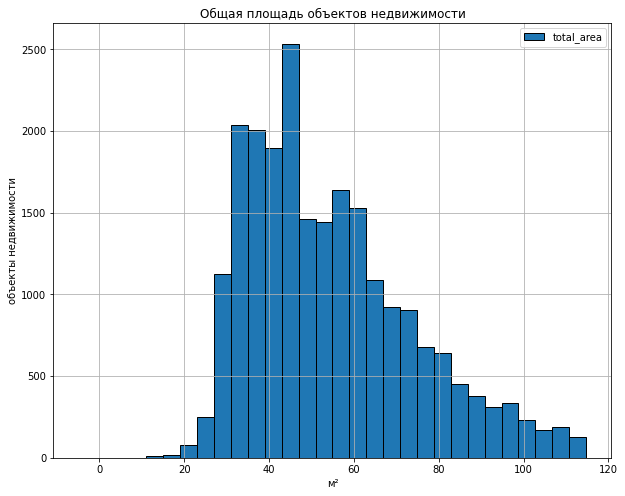

In [45]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['total_area'].quantile(.25) # первый квартиль Q1
q3 = data['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['total_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод**:
    На рынке недвижимости наибольшее количество предложений квартир общей площадью от 30 до 50 кв.м., 
    
максимальное количество предложений для квартир с общей площадью - примерно 45-46 кв.м.
    
минимальное количество предложений для квартир с общей площадью - примерно 22 кв.м. - вероятнее всего, студии.

####  Анализ жилой площади

In [46]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [47]:
data_update1 = data.query('living_area >= 10 & living_area <= 200')

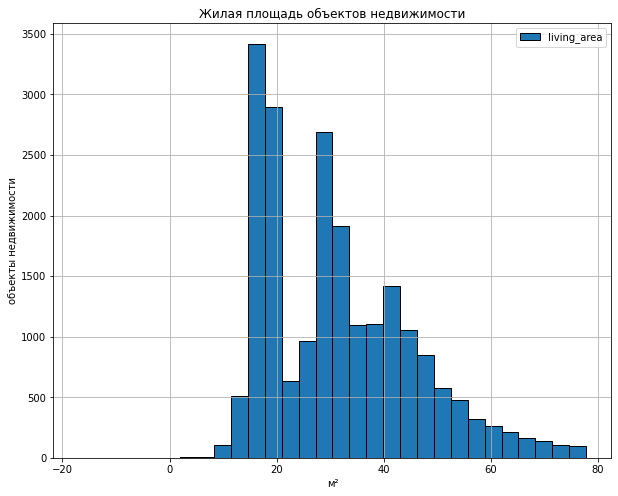

In [48]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['living_area'].quantile(.25) # первый квартиль Q1
q3 = data['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод**:
    На рынке недвижимости наибольшее количество предложений квартир с жилой площадью от 14 до 20 кв.м., 
    
максимальное количество предложений для квартир с жилой площадью - примерно 17 кв.м.
    
наблюдается некий спад предложений для квартир с жилой площадью примерно 13, 24, 33, 34, 36 - 45 кв.м. 

#### Анализ площади кухни

In [49]:
data['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

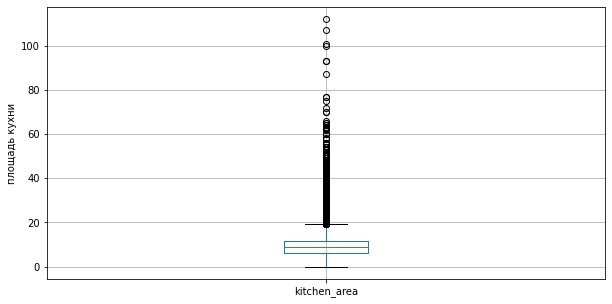

In [50]:
data.boxplot('kitchen_area', figsize=(10,5))
plt.ylabel('площадь кухни')
plt.show()

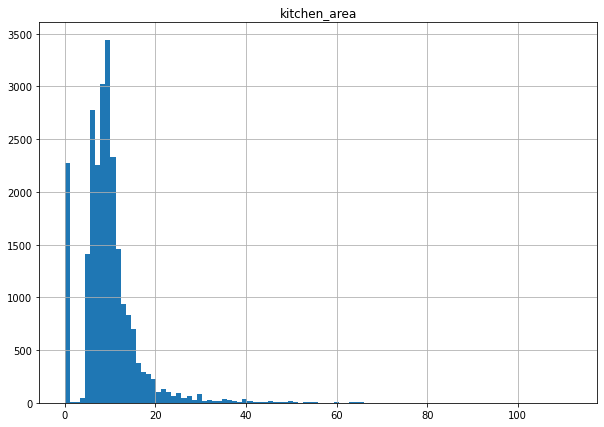

In [51]:
data.hist('kitchen_area', bins=100, figsize=(10,7));

##### Оставим значения от 5 до 15 кв.м., чтобы диаграмма и гистограмма были более наглядными

In [52]:
data = data.query('kitchen_area > 5 and kitchen_area <= 15')

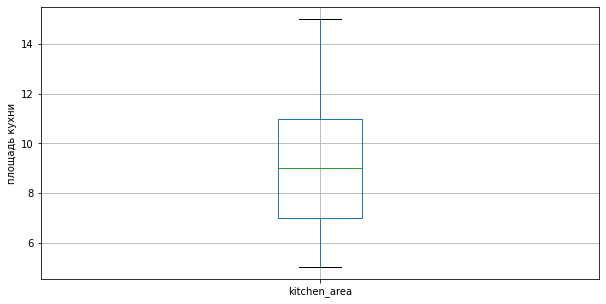

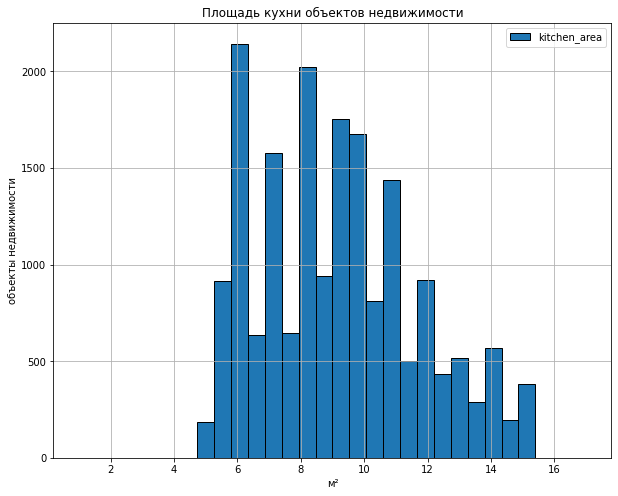

In [53]:
data.boxplot('kitchen_area', figsize=(10,5))
plt.ylabel('площадь кухни')
plt.show()

# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод**:
    На рынке недвижимости наибольшее количество предложений квартир c площадью кухни 6 кв.м., а также довольно-таки много предложений с площадью кухни 7, 8, 9, 10 кв.м. 
    
А для покупателей, как правило, является важным то, чтобы кухня была большой.

#### Анализ цен квартир

In [54]:
data['last_price'].describe()

count    1.856400e+04
mean     5.278775e+06
std      3.800590e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.100000e+06
max      1.300000e+08
Name: last_price, dtype: float64

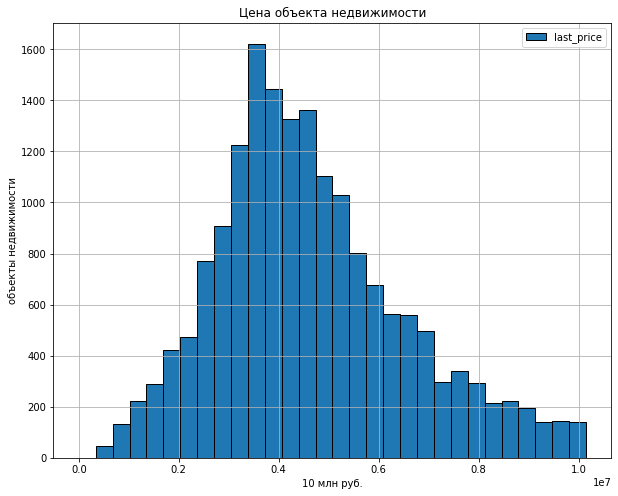

In [55]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['last_price'].quantile(.25) # первый квартиль Q1
q3 = data['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
data['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

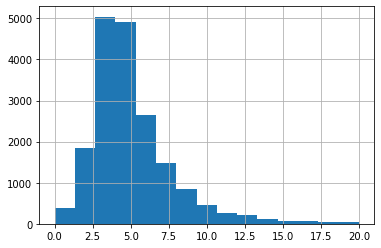

In [56]:
(data['last_price']/1000000).hist(range=(0, 20), bins=15);

**Вывод:**

На рынке недвижимости больше всего предложений квартир стоимостью от 3,5 до 3,9 миллиона рублей. Можно предположить, что количество таких предложений велико, поскольку и спрос на них также высок — из-за их средней цены.

#### Анализ количества комнат

In [57]:
data['rooms'].describe()

count    18564.000000
mean         1.996606
std          0.952370
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

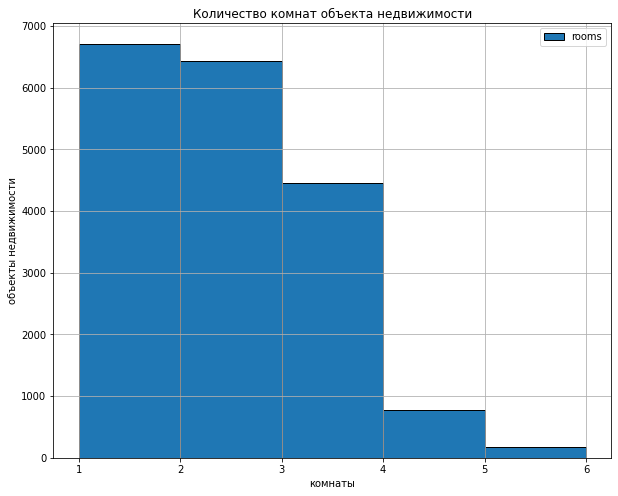

In [58]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['rooms'].quantile(.25) # первый квартиль Q1
q3 = data['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
data['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод**:
    На рынке недвижимости наибольшее количество предложений **однокомнатных** и чуть меньше двухкомнатных квартир.

#### Анализ высоты потолков

In [59]:
data['ceiling_height'].describe()

count    18564.000000
mean         2.680220
std          0.229272
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [60]:
data= data.query('ceiling_height < 7')

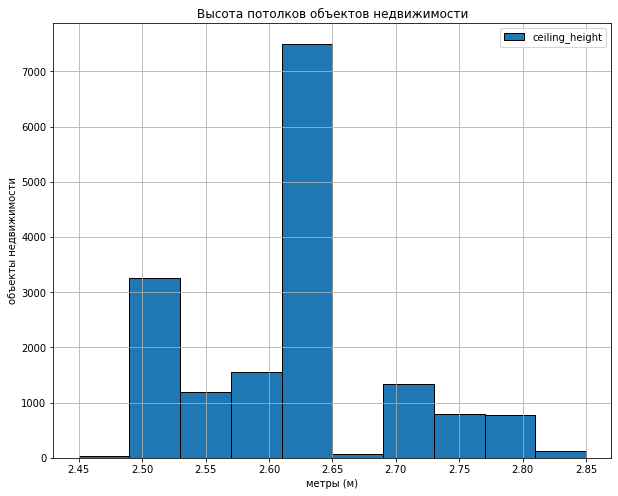

In [61]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму высоты потолков
data['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод**:
    На рынке недвижимости наибольшее количество предложений квартир с высотой потолков 2,65 м, на следующем месте квартиры с высотой потолков 2.5 м.

#### Анализ типа этажа квартир


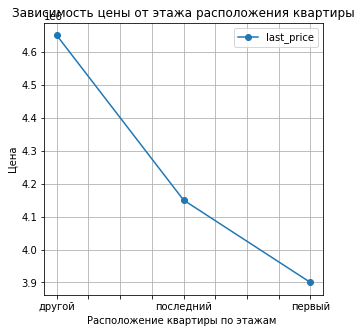

In [62]:
#Применим сводную табилцу
(
    data.pivot_table(index='floor_group', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

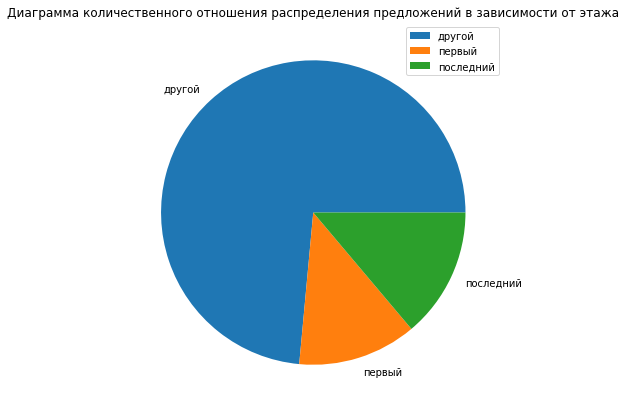

In [63]:
data.pivot_table(index='floor_group',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

**Вывод:**

Из графиков видно, что квартиры с типом этажа «другой» пользуются большим спросом и имеют высокую стоимость. Это делает их более ценными.

Кроме того, можно предположить, что на такие квартиры будет больше предложений, так как они востребованы.

Несмотря на это, квартиры на первом и последнем этажах также продаются. Возможно, люди хотят сменить жилплощадь и выбирают квартиры на других этажах. Также те, кто ищет более доступные варианты, могут обратить внимание на квартиры на первом или последнем этажах.

#### Анализ общего количества этажей

In [64]:
data['floors_total'].describe()

count    18559.000000
mean        10.608276
std          6.480708
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

In [65]:
data_update = data.query('floors_total < 35') #В СПб самое высокое жилое здание - 35 этажей

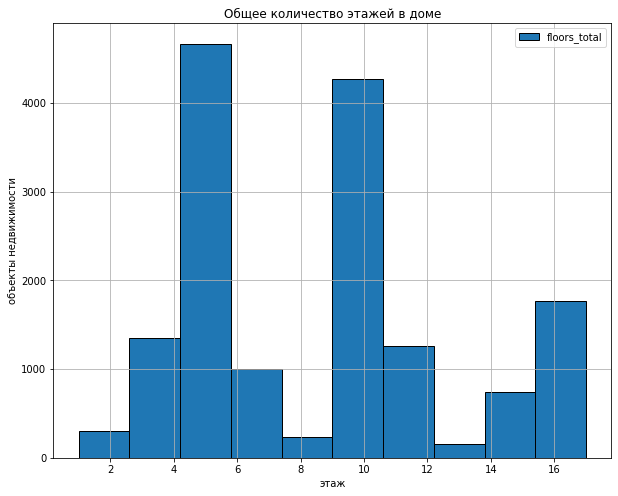

In [66]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму общего кол-ва этажей в доме
data['floors_total'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод:**

Можно сделать вывод, что большинство квартир продаётся в пятиэтажных домах, а на втором месте по популярности – девятиэтажные.

Вероятно, пятиэтажные дома – это 'хрущёвки'. Об этом можно судить исходя из предыдущих пунктов исследования (по стоимости квартир, высоте потолков, количеству комнат и площади)

#### Анализ расстояния до центра города в метрах

In [67]:
data['city_centers_nearest'].describe()

count    14147.000000
mean     14694.379939
std       8484.654852
min        181.000000
25%      10337.000000
50%      13423.000000
75%      16478.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

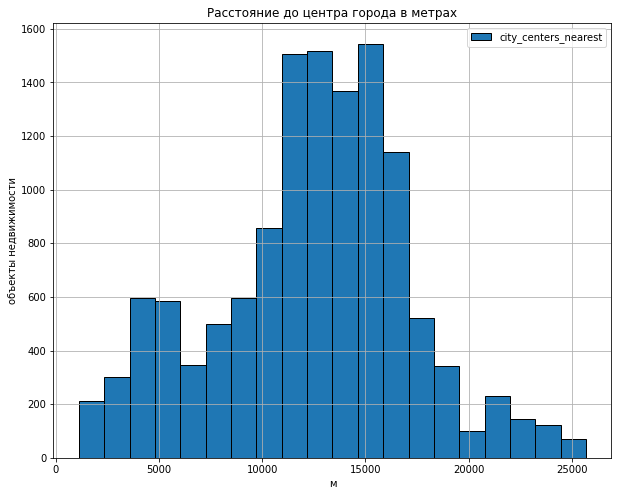

In [68]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод:**

Можно сделать вывод, что наибольшее количество предложений о продаже квартир, которые находятся на расстоянии от 12-15 км. от центра 

#### Анализ расстояния до ближайшего парка 

In [69]:
data['parks_nearest'].describe()

count    6053.000000
mean      484.768214
std       325.074315
min         1.000000
25%       289.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

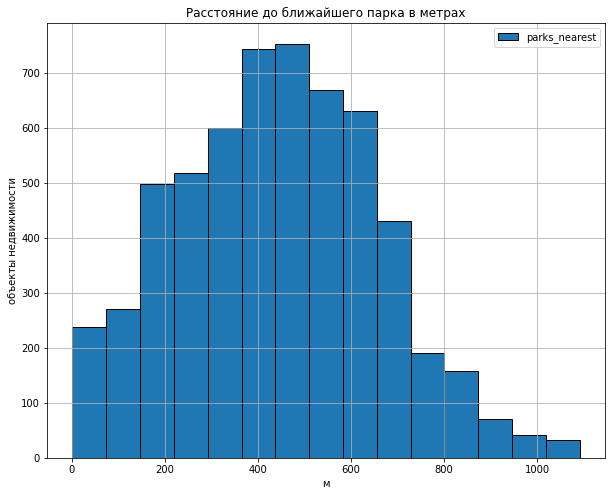

In [70]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['parks_nearest'].hist(bins=15, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод**

Можно сделать вывод, что наибольший спрос на квартиры наблюдается в домах, расположенных в 400–600 метрах от парков. Это может быть интересно для покупателей.

- **Общий вывод по разделу:**

    * На рынке самое большое предложение квартир с общей площадью от 30 до 50 кв. метров, причем максимальное количество предложений для квартир с площадью 45-46 кв.м., а минимальное количество предложений на, вероятнее всего, квартиры студии (вывод сделан исходя из общей площади)

    * Больше всего продают квартир с жилой площадью около 17 кв. м.

    * На рынке недвижимости наибольшее количество предложений квартир c площадью кухни 6 кв.м., а также довольно-таки много предложений с площадью кухни 7, 8, 9, 10 кв.м. А для покупателей, как правило, является важным то, чтобы кухня была большой.
    * Средняя цена квартир по результатам исследования варьирует в районе 3,5 - 3,9 млн. руб.
    * Среди предложений больше всего однокомнатных квартир. 
    * Среди большинства предложений высота составляет 2.65 метров, далее 2.5 метров.
    * Менее ценными считаются квартиры на "первом" этаже. На круговой диаграмме заметно, что общее количество предложений "первого" и "последнего" этажа составляет почти 25% от общего количества.
    * Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.
    * Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 15-16 км от центра).
    * Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 500 - 700 метров.



Исходя из проведённого исследования можно составить следующий "портрет" квартиры на продажу: Это одно- или двухкомнатная квартира в пятиэтажном доме, средней общей площадью 45 кв.м., с жилой площадью 17 кв.м.,с кухней в 6 кв.м, находящаяся на 2-4 этаже, с высотой потолков 2,65 метра, находящаяся на  скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. от центра города и расположенная в 500-700 м. от парков.

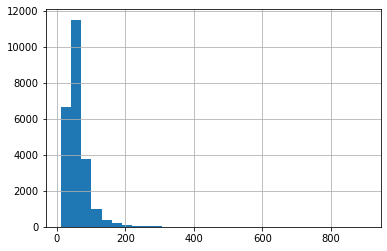

In [71]:
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

#### Изучение времени продажи квартир 

In [72]:
data.days_exposition.describe()

count    16121.000000
mean       177.998883
std        214.232633
min          1.000000
25%         43.000000
50%         97.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

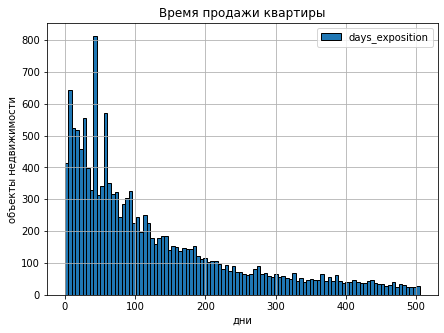

In [73]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму времени продажи квартиры
data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

**Вывод**

Можно сделать вывод, что среднее время продажи квартиры составляет 50-60 дней. На это также влияют сопутствующие факторы, такие как: удалённость от центра, площадь, этаж, цена). При совпадении благоприятности данных факторов может присутствовать наибольшая вероятность продажи квартиры. Но также, чем дольше квартира находится на сайте с объявлениями, тем меньше шансов, что она в итоге будет продана, возможно, она не удовлетворяет многим потребностям покупателей.

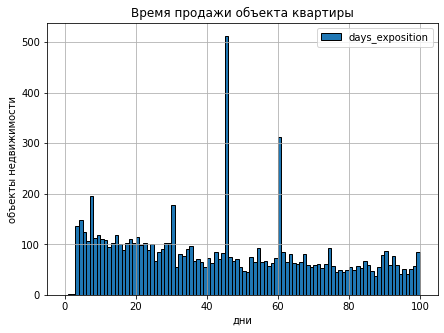

In [74]:
# Период до 100 дней
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Чаще всего квартиры продают за 45 и 60 дней. Но тут важно учесть, что возможно квартира не продана, а просто закрылось объявление в связи с истекшим сроком публикации.

#### Определим факторы, которые больше всего влияют на стоимость объекта

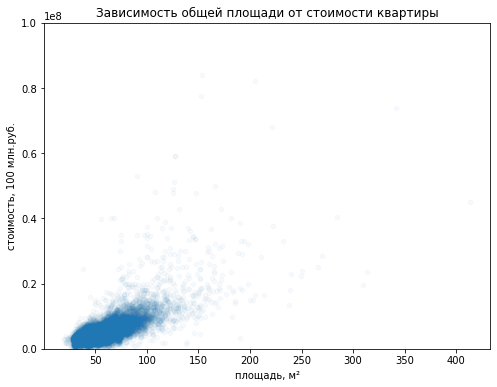

In [75]:
data.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

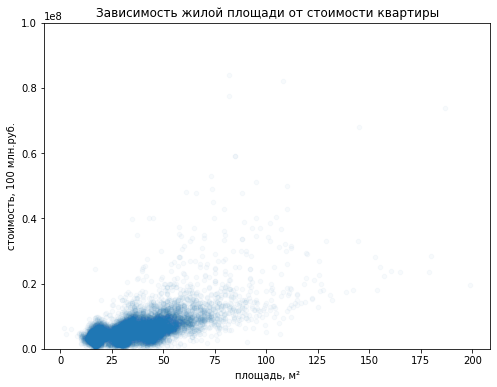

In [76]:
# используем тип графика scatter
data.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

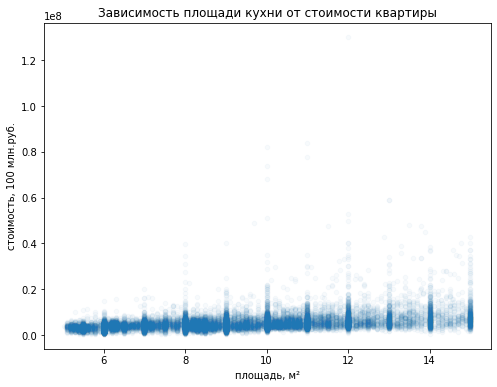

In [77]:
# используем тип графика scatter
data.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.show()

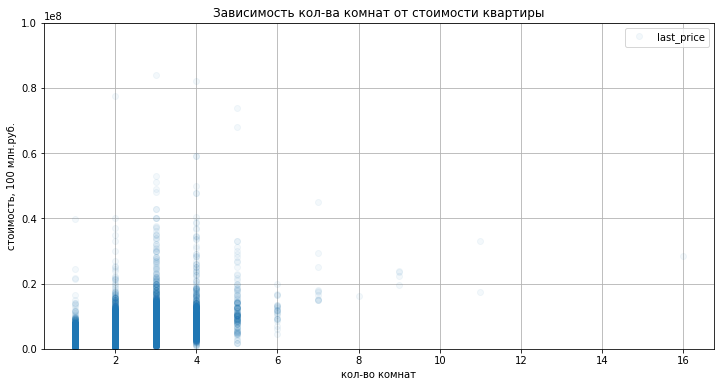

In [78]:
data.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.05)
plt.title('Зависимость кол-ва комнат от стоимости квартиры')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

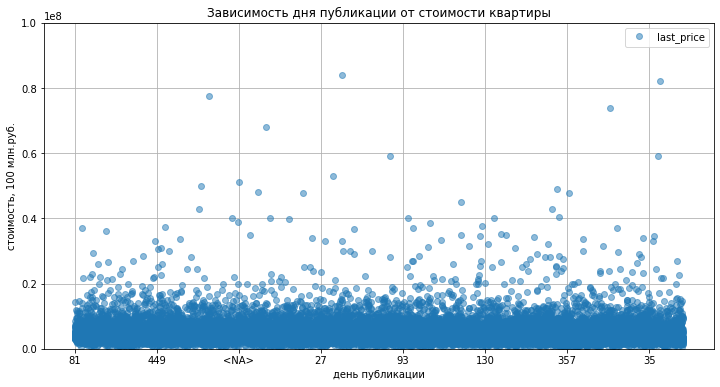

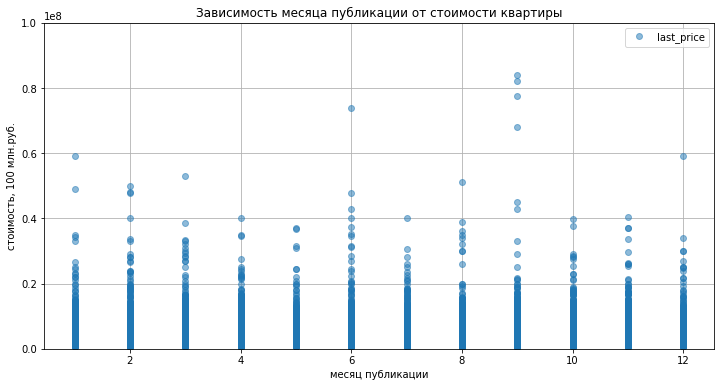

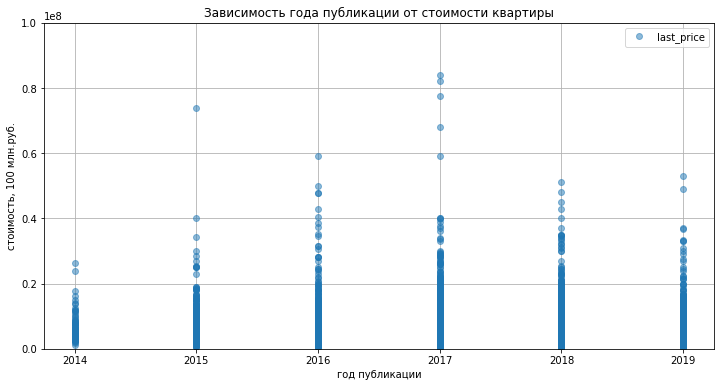

In [79]:
# график дня недели от стоимости
data_update.plot(x = 'days_exposition', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

# график месяца от стоимости
data_update.plot(x = 'month_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

#график года от стоимости
data_update.plot(x = 'year_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

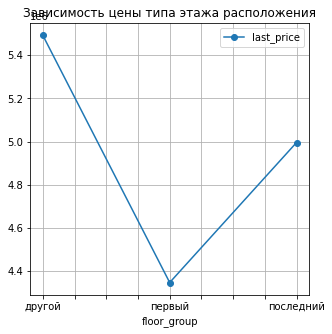

In [80]:
(
    data.pivot_table(index='floor_group', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

**Вывод**

Можно сделать вывод, что не все из проанализированных нами факторов имеют значительное влияние на цену продажи квартиры.
Так, из очевидных факторов, на стоимость влияет количество комнат: чем больше комнат, тем больше цена.

Площадь. Данный фактор также имеет линейную зависимость (чем больше площадь, тем больше стоимость квартиры).

А также можно назвать более ценными квартиры, которые располагаются ближе к центру города и находятся не на первом этаже. Можно заметить, что прослеживается зависимость, что квартиры на последнем этаже также продаются по высокой цене. Это можно объяснить тем, что, возможно, играют роль в цене данных квартир не сколько этаж, а сколько площадь, количество комнат и так далее.

А вот по году размещения объявления основной пик в стоимости жилья в 2015 г., затем происходит постепенное снижение цены к 2016 году и увеличение цен к 2019. 









#### Расчет средней стоимости одного квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений

In [81]:
#Проведем исследование, используя метод сводных таблиц
the_best_10 = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
the_best_10.columns=['number_of_ads']
the_best_10.reset_index()

,locality_name,number_of_ads
0,санкт-петербург,12135
1,мурино,445
2,шушары,372
3,кудрово,338
4,всеволожск,333
5,колпино,296
6,пушкин,265
7,парголово,260
8,гатчина,258
9,выборг,174


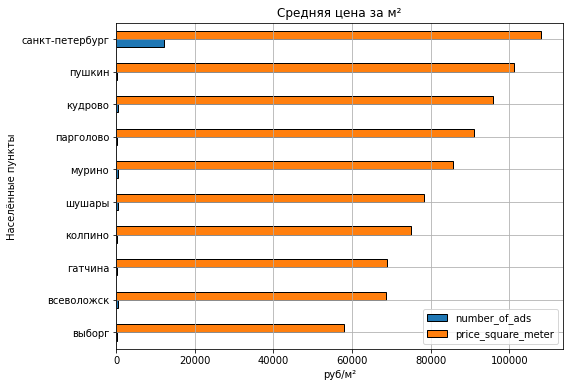

In [82]:
the_best_10['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')
the_best_10s = the_best_10.sort_values(by='price_square_meter', ascending=False).reset_index()

# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

the_best_10.sort_values(by='price_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('Населённые пункты')
plt.show()

In [83]:
#Выделим максимальную и минимальную цены
price_10 = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_10.columns = ['count']
price_10 = price_10.sort_values(by='count', ascending=False).head(10)
price_10['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter').round(2)
price_10.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
санкт-петербург,12135,108180.54
пушкин,265,101195.16
кудрово,338,95861.22
парголово,260,90945.65
мурино,445,85697.26
шушары,372,78283.85
колпино,296,74924.83
гатчина,258,68864.73
всеволожск,333,68706.02


**Вывод**

Можно сделать вывод, что максимальная стоимость квадратного метра квартиры наблюдается в Санкт-Петербурге.

Далее идут Пушкин и Кудрово, у них стоимость квадратного метра меньше, чем в Санкт-Петербурге, но всё равно считается высокой. Это можно объяснить расположением данных населённых пунктов (практически относятся к СПб), скорее всего могут играть роль и другие дополнительные факторы, такие как: количество комнат, этаж, удалённость от парков, водоёмов.
Видимо, в этих пунктах они удовлетворяют потребностям покупателей.


Наименьшая стоимость квадратного метра наблюдается в Выборге, Всеволжске. На стоимость также влияет удалённость от центра города, возможно, меньшая площадь, комнатность. Нет рядом парков, что снижает стоимость квартиры. 


#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [84]:
data.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    12105.000000
mean        12.049318
std          4.612133
min          0.000000
25%          9.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

Данные помогают оценить расположение квартир от центра города.


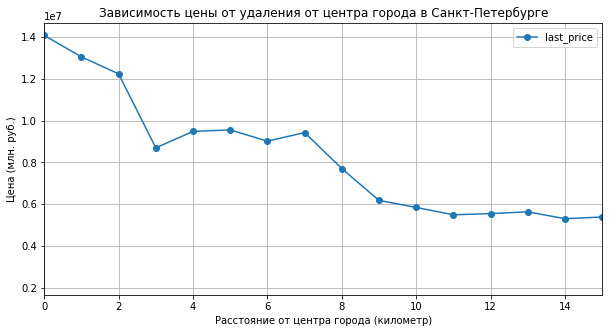

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
distance_city_center,
0.0,1.407531e+07
1.0,1.304658e+07
2.0,1.223225e+07
3.0,8.692248e+06
4.0,9.477862e+06
5.0,9.550721e+06
6.0,9.012242e+06
7.0,9.422253e+06
8.0,7.702289e+06


In [85]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
data.query('locality_name == "санкт-петербург" and distance_city_center<10').pivot_table(values='last_price', index='distance_city_center')

**Вывод по разделу**:

Самые дорогие квартиры находятся в центре города. Дальше, чем более удалённым становится населённый пункт, тем меньше стоимость квартиры.

На мой взгляд, центр заканчивается где-то в районе 8 км, потому что понятно, что в значения 0-1-2 км цены самые высокие, дальше они снижаются заметно, так как начинается удаление от центра города, а после 8 км каких-то резких повышений и снижений стоимости нет, что может говорить о том, что там нет особо учёта фактора удалённости от центра


### Общий вывод

В результате проделанной работы были получены и обработаны данные, проведено исследование стоимости недвижимости в городе Санкт-Петербург.

Были проверены, заполнены пропуски, которые могли возникнуть в результате человеческого фактора, либо технической ошибки (не обработались все данные, люди не стали вносить никаких значений, подразумевая, что какой-то пункт отсутствовует (например, балкон).
    
Заполнили пропуски медианным значением, так как оно не чувствительно к выбросам и отражает ситуацию более полно, если сравнивать со средним арифметическим.

**По построенным гистограммам можно сделать вывод, что имеются аномальные значения (например, количество комнат "0"). В результате исследования они были также удалены.**

Были проверены явные и неявные дубликаты, удалены неявные дубликаты, где это возможно. Невозможно это было в случае с названием населенного пункта "Старая". В списке населенных пунктов несколько вариантов, которые начинаются с этого прилагательного, поэтому определить, к чему это относится, сложно. Возникло это, вероятнее всего, ввиду человеческого фактора.

Данные были подведены под один регистр.

- Был исправлен тип данных таблицы там, где это было необходимо:

    * is apartment должен иметь тип данных bool, так как данные в данном столбце либо да, либо нет;

    * first_day_exposition должен быть datetime;

    * floors_total, days_exposition, balcony, parks_around3000, ponds_around3000 должны быть int64, так как данные столбцы содержат в себе целочисленные значения.

Было исправлено имя столбцa cityCenters_nearest в соотвтствии со "змеиным" регистром, так как это является правилом хорошего стиля.

- По исследовательскому анализу данных:
    В результате исследования в таблицу добавлены новые параметры:
    * цена одного квадратного метра;
    * день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
    * месяц публикации объявления;
    * год публикации объявления;
    * тип этажа квартиры (значения — «первый», «последний», «другой»);
    * расстояние до центра города в километрах.
    
Наибольшая цена одного квадратного метра наблюдается в городе Санкт-Петербург.

Далее идут Пушкин и Кудрово (практически относятся к СПб, поэтому стоимость квадратного метра относительно высока), но также это не единственный фактор, по которому может быть такая стоимость.

Наименьшая стоимость квадратного метра наблюдается в Выборге, Всеволжске. На стоимость также влияет удалённость от центра города, возможно, меньшая площадь, комнатность. Нет рядом парков, что снижает стоимость квартиры.

А также можно назвать более ценными квартиры, которые располагаются ближе к центру города и находятся не на первом этаже. Можно заметить, что прослеживается зависимость, что квартиры на последнем этаже также продаются по высокой цене. Это можно объяснить тем, что, возможно, играют роль в цене данных квартир не сколько этаж, а сколько площадь, количество комнат и так далее.

На рынке самое большое предложение квартир с общей площадью от 30 до 50 кв. метров, причем максимальное количество предложений для квартир с площадью 45-46 кв.м., а минимальное количество предложений на, вероятнее всего, квартиры студии.

Больше всего продают квартир с жилой площадью около 17 кв. м.

На рынке недвижимости наибольшее количество предложений квартир c площадью кухни 6 кв.м., а также довольно-таки много предложений с площадью кухни 7, 8, 9, 10 кв.м. Можно предположить, что для покупателей, как правило, является важным то, чтобы кухня была большой.

Средняя цена квартир по результатам исследования варьирует в районе 3,5 - 3,9 млн. руб.

Среди предложений больше всего однокомнатных квартир, **затем идут двухкомнатные**.

Среди большинства предложений высота потолков составляет 2.65 метров.

Менее ценными считаются квартиры на "первом" и "последнем" этажах.

Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.

Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии **12-15** км от центра).

Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет **400 - 600 метров.**

Было установлено среднее время продажи квартиры, которое составляет 50-60 дней. **Есть пики в значениях 45 дней, что может говорить о том, что часто объявления закрывались на 45 день, это может быть связано, например, с тем, что истекло время публикации. Есть аномально высокие значения, может говорить о человеческом факторе: например, забыли снять с публикации после продажи.**
А также была установлена следующая корреляция: чем дольше квартира находится на сайте с объявлениями, тем меньше шансов, что она в итоге будет продана, возможно, она не удовлетворяет определённым потребностям покупателей.

Площадь. Данный фактор также имеет линейную зависимость (чем больше площадь, тем больше стоимость квартиры).

А вот по году размещения объявления основной пик в стоимости жилья в 2014-2015 годах, затем происходит постепенное снижение цены к 2018 году и увеличение цен к 2019.


Исходя из проведённого исследования можно составить следующее среднестатистическое предложение о продаже квартиры:

Одно- или двухкомнатная квартира в пятиэтажном доме, средней общей площадью 45 кв.м., с жилой площадью 17 кв.м.,с кухней в 6 кв.м, находящаяся на 2-4 этаже, с высотой потолков 2,65 метра, находящаяся, скорее всего, на удалении 13 км. от центра города и расположенная в 400-600 м. от парков.